 ### Trabalho de Conclusão de Curso - TCC Puc Minas EAD Ciência de Dados e Big Data

# PLN (Processamento de linguagem natural) referente às avaliações do aplicativo de relacionamento “Tinder”  e sobre mais de 70 mil tweets do documentário "Tinder Swindler" (O golpista do Tinder). 

#### O conjunto de dados referentes à avaliações de usuários de aplicativos de relacionamento se referem aos aplicativos Tinder, Bumble e Hinge no período de 2017 a 2022.

##### O DataSet é um arquivo csv com 6 colunas e 681.994 linhas. O arquivo encontra-se disponível no site https://www.kaggle.com/datasets/sidharthkriplani/datingappreviews



##### O conjunto de dados sobre o tópico "Tinder Swindler" se refere ao documentário britânico sobre crimes reais lançado pela Netflix em 2 de fevereiro de 2022. O filme conta a história do vigarista israelense Simon Leviev, que usa o aplicativo de namoro Tinder para localizar indivíduos que ele manipula emocionalmente com o objetivo de conseguir apoio financeiro para seu estilo de vida luxuoso.


###### O DataSet é um arquivo csv com 9 colunas, mais de 70 mil linhas e esta disponível no site https://www.kaggle.com/deepcontractor/100k-tinder-swindler-tweets

In [ ]:
#pip install wordcloud

In [1]:
# Importando Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK ferramentas para processamento de texto
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

# Pacotes de Modelagem
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Lendo o DataSet referente à avaliações de aplicativos de namoro
review_df2 = pd.read_csv('DatingAppReviewsDataset.csv')
review_df2.head()
review_df2.shape
review_df2.to_csv('DatingAppReviewsDataset.csv', encoding='utf-8')
#review_df2.to_csv('DatingAppReviewsDataset.csv', index = False)
#review_df2.drop(review_df2.columns[review_df2.columns.str.contains('unnamed', case = False)], axis = 1, inplace = True)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Name,Review,Rating,#ThumbsUp,Date&Time,App
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,linah sibanda,On this app i cant find a partner,5,0,18-02-2022 01:19,Tinder
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,Norman Johnson,Tinder would be so much better if we could spe...,3,0,18-02-2022 01:16,Tinder
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,David Hume,Still doesn't correctly notify matches or mess...,1,0,18-02-2022 01:11,Tinder
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,0,18-02-2022 01:11,Tinder
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,Arthur Magamedov,Love it!,5,0,18-02-2022 01:06,Tinder


(681994, 25)

In [3]:
#Excluíndo colunas Unnamed
review_df2.drop('Unnamed: 0', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1.1.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1.1.1.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1.1.1.1.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1.1.1.1.1.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1.1.1.1.1.1.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1', axis = 1, inplace = True)
review_df2.drop('Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1', axis = 1, inplace = True)
review_df2.head()

,Name,Review,Rating,#ThumbsUp,Date&Time,App
0,linah sibanda,On this app i cant find a partner,5,0,18-02-2022 01:19,Tinder
1,Norman Johnson,Tinder would be so much better if we could spe...,3,0,18-02-2022 01:16,Tinder
2,David Hume,Still doesn't correctly notify matches or mess...,1,0,18-02-2022 01:11,Tinder
3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,0,18-02-2022 01:11,Tinder
4,Arthur Magamedov,Love it!,5,0,18-02-2022 01:06,Tinder


In [4]:
# dividindo dataframe por índice de linha
df_1 = review_df2.iloc[:8000,:]
df_2 = review_df2.iloc[8001:,:]
print("Novos DataFrames - {} , {}".format(df_1.shape, df_2.shape))

Novos DataFrames - (8000, 6) , (673993, 6)


In [5]:
# Verficando se as 8.000 primeiras linhas se referem ao app Tinder
df_3 = df_1[(df_1.App=='Tinder')].count()[0]
df_3

8000

In [6]:
#Verificando o tipo de dado de cada coluna
df_1.dtypes

Name         object
Review       object
Rating        int64
#ThumbsUp     int64
Date&Time    object
App          object
dtype: object

In [7]:
# Verificando se possui valores nulos
df_1.isnull().sum()

Name         0
Review       0
Rating       0
#ThumbsUp    0
Date&Time    0
App          0
dtype: int64

In [8]:
#Separando em dois campos: Um referente à coluna "Review" que se refere aos comentários e a coluna "Rating" que se refere a nota.
review = df_1['Review']
rating = df_1.drop(['Rating'],axis=1)

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RWINFO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RWINFO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
#limpeza dos dados
comentarios1 = []
stop_words1=["0o", "app", "0s", "absolutely", "phone", "dating",  "apps", "tinder", "number", "super", "likes", "week", "reason", "complete", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
for words in review:
    apenas_letras1 = re.sub("[^a-zA-Z]", " ",words)#somente letras
    tokens1= nltk.word_tokenize(apenas_letras1) #tokenize as sentenças
    minusculas1 = [l.lower() for l in tokens1] #converte para minúsculos
    resultado_filtrado1 = list(filter(lambda l: l not in stop_words1, minusculas1)) #Remove stopwords 
    comentarios1.append(' '.join(resultado_filtrado1))

<Figure size 1440x864 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

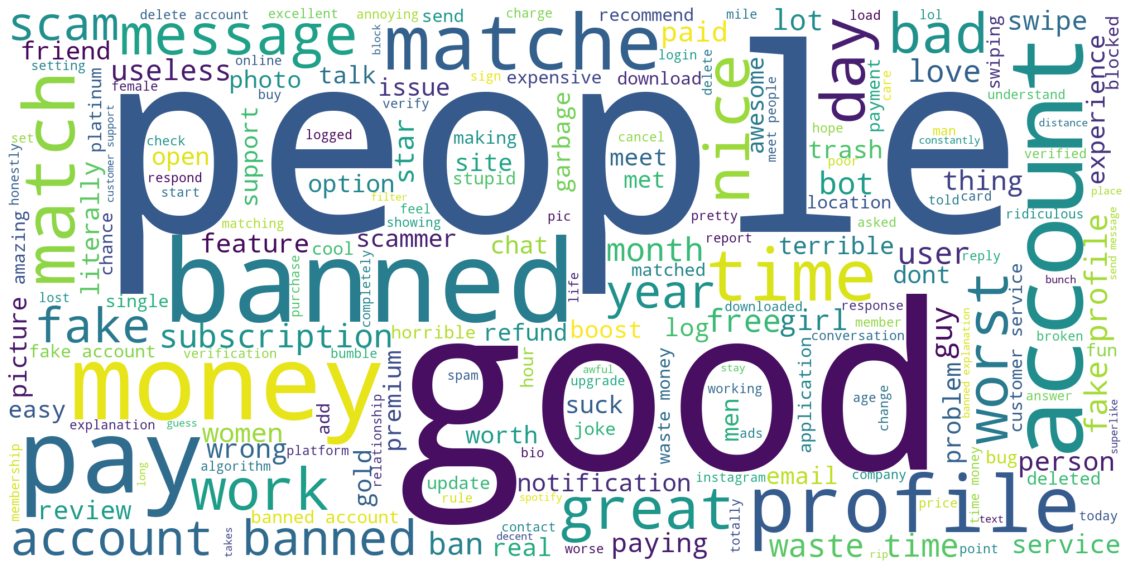

In [11]:
# Visualizando os dados
# Comentários

#Usando wordcloud para visualizar comentarios
palavras1=(" ").join(comentarios1)
wordcloud1 = WordCloud(width = 2000, height = 1000,background_color='white').generate(palavras1)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
# Usando CountVectorizer para obter os unigramas 
co1 = CountVectorizer(ngram_range=(1,1))
counts1 = co1.fit_transform(comentarios1)
unigrams1 = pd.DataFrame(counts1.sum(axis=0),columns=co1.get_feature_names()).T.sort_values(0,ascending=False).head(15)

C:\Users\RWINFO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
# Renomeando as colunas
unigrams2=unigrams1
unigrams2=unigrams2.reset_index()
unigrams2.rename(columns={'index':'Unigrama', 0:'Frequência'}, inplace=True)
print(unigrams2)

        Unigrama  Frequência
0         banned        1089
1         people         990
2        account         920
3           good         853
4          money         749
5            pay         601
6           time         574
7        matches         524
8           fake         478
9          match         449
10       profile         367
11      profiles         336
12         waste         331
13          nice         330
14  subscription         304


In [14]:
# Usando CountVectorizer para obter os bigramas mais importantes
co1 = CountVectorizer(ngram_range=(2,2))
counts1 = co1.fit_transform(comentarios1)
bigrams = pd.DataFrame(counts1.sum(axis=0),columns=co1.get_feature_names()).T.sort_values(0,ascending=False).head(15)

C:\Users\RWINFO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
# Renomeando as colunas
bigramas1=bigrams
bigramas1=bigramas1.reset_index()
bigramas1.rename(columns={'index':'Bigrama', 0:'Frequência'}, inplace=True)
print(bigramas1)

               Bigrama  Frequência
0       account banned         237
1           waste time         200
2        fake profiles         149
3     customer service          77
4          waste money          74
5       banned account          70
6        fake accounts          61
7       delete account          58
8          meet people          56
9           time money          47
10    customer support          40
11  banned explanation          39
12         spend money          37
13         real people          35
14           years ago          34


<Figure size 1008x432 with 0 Axes>

Text(0.5, 1.0, 'Conjunto de duas palavras mais fequentes')

Text(0.5, 0, 'Frequência')

Text(0, 0.5, 'Bigramas')

<BarContainer object of 12 artists>

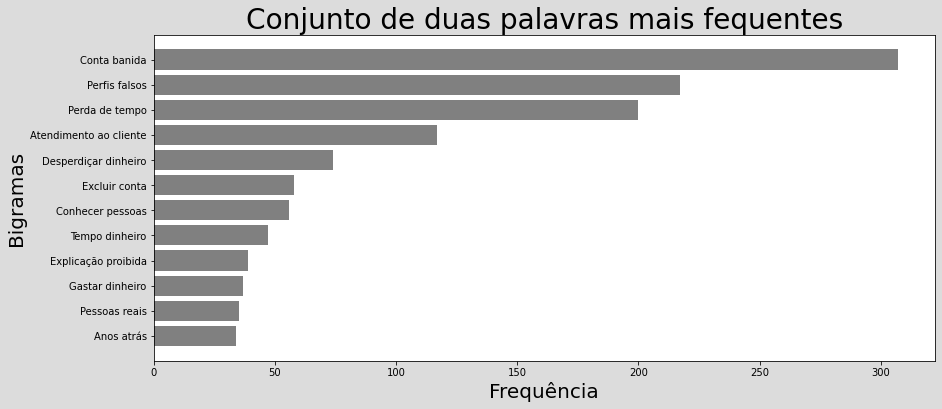

In [16]:
# Gráfico de bigramas - em português concatenando dos bigramas idênticos - total 13 linhas 
plt.figure(figsize = (14,6), facecolor='gainsboro')
plt.title('Conjunto de duas palavras mais fequentes', fontsize=28)
plt.xlabel('Frequência', fontsize=20)
plt.ylabel('Bigramas', fontsize=20)
freq_x=[34, 35, 37, 39, 47, 56, 58, 74, 117, 200, 217, 307]
bigramas_y=['Anos atrás',
           'Pessoas reais',
           'Gastar dinheiro',
           'Explicação proibida',
           'Tempo dinheiro',
           'Conhecer pessoas',
           'Excluir conta',
           'Desperdiçar dinheiro',
           'Atendimento ao cliente',
           'Perda de tempo',
           'Perfis falsos',
           'Conta banida']
x=freq_x
y=bigramas_y
plt.barh(y,x, color='gray')

##### Análise dos bigramas do usuários que deram nota 1 ou 2 para o aplicativo Tinder

In [17]:
df_4 = (df_1[['Review', 'Rating']])
df_5 = df_4['Rating'] < 3
df_6 = df_4[df_5]
df_6

,Review,Rating
2,Still doesn't correctly notify matches or mess...,1
3,"Got banned because I updated my bio to say ""I ...",2
7,Just tested after originally noticing a flux ;...,1
10,"I don't know why I was banned again, what happ...",2
12,They banned my account without me doing anything,1
...,...,...
7993,Why the hell is my match message keep disappea...,1
7994,Just a cash grab these days.,1
7996,Can't do much without paying. I only wanted to...,1
7997,I get hardly any likes no mater how many yikes...,2


In [18]:
review1 = df_6['Review']

In [19]:
#limpeza dos dados
comentarios4 = []
stop_words4=["0o", "app", "0s", "absolutely", "gold" ,"years", "ago", "membership", "phone", "profile", "dating",  "apps", "tinder", "number", "super", "likes", "week", "reason", "complete", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
for words in review1:
    apenas_letras4 = re.sub("[^a-zA-Z]", " ",words)#somente letras
    tokens4= nltk.word_tokenize(apenas_letras4) #tokenize as sentenças
    minusculas4 = [l.lower() for l in tokens4] #converte para minúsculos
    resultado_filtrado4 = list(filter(lambda l: l not in stop_words4, minusculas4)) #Remove stopwords 
    comentarios4.append(' '.join(resultado_filtrado4))

In [20]:
# Usando CountVectorizer para obter os bigramas 
co4 = CountVectorizer(ngram_range=(2,2))
counts4 = co4.fit_transform(comentarios4)
bigramas4 = pd.DataFrame(counts4.sum(axis=0),columns=co4.get_feature_names()).T.sort_values(0,ascending=False).head(15)

C:\Users\RWINFO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
# Renomeando as colunas
bigramas5=bigramas4
bigramas5=bigramas5.reset_index()
bigramas5.rename(columns={'index':'Bigrama', 0:'Frequência'}, inplace=True)
print(bigramas5)

                 Bigrama  Frequência
0         account banned         221
1             waste time         198
2          fake profiles         136
3       customer service          75
4            waste money          71
5         banned account          69
6         delete account          58
7          fake accounts          55
8             time money          45
9       customer support          39
10    banned explanation          38
11           spend money          37
12   cancel subscription          27
13  community guidelines          25
14     paid subscription          25


<Figure size 1008x432 with 0 Axes>

Text(0.5, 1.0, 'Conjunto de duas palavras mais fequentes')

Text(0.5, 0, 'Frequência')

Text(0, 0.5, 'Bigramas')

<BarContainer object of 11 artists>

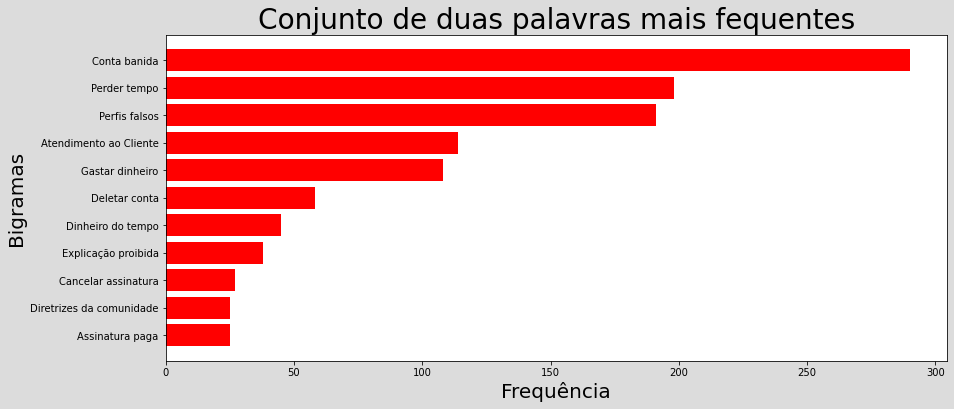

In [22]:
# Gráfico de bigramas - em português concatenando dos bigramas idênticos - total 14 linhas 
plt.figure(figsize = (14,6), facecolor='gainsboro')
plt.title('Conjunto de duas palavras mais fequentes', fontsize=28)
plt.xlabel('Frequência', fontsize=20)
plt.ylabel('Bigramas', fontsize=20)
freq_x=[25, 25, 27, 38, 45, 58, 108, 114, 191, 198, 290]
bigramas_y=['Assinatura paga',
           'Diretrizes da comunidade',
           'Cancelar assinatura',
           'Explicação proibida',
           'Dinheiro do tempo',
           'Deletar conta',
           'Gastar dinheiro',
           'Atendimento ao Cliente',
           'Perfis falsos',
           'Perder tempo',
           'Conta banida']
x=freq_x
y=bigramas_y
plt.barh(y,x, color='red')

##### Análise dos bigramas do usuários que deram nota 4 ou 5 para o aplicativo Tinder

In [23]:
df_7 = (df_1[['Review', 'Rating']])
df_8 = df_7['Rating'] > 3
df_9 = df_7[df_8]
df_9

,Review,Rating
0,On this app i cant find a partner,5
4,Love it!,5
5,Good app.,5
6,Its great app but i just find it too expensive,5
8,My experiences on tinder have been very good. ...,5
...,...,...
7981,At this point I think you'll find a better mat...,5
7983,Awsome app,5
7991,The app helps locate nearby matches,5
7995,Best app in the world,5


In [24]:
review2 = df_9['Review']

In [25]:
#limpeza dos dados
comentarios5 = []
stop_words5=["0o", "app", "0s", "absolutely", "gold" ,"years", "ago", "membership", "phone", "profile", "dating",  "apps", "tinder", "number", "super", "likes", "week", "reason", "complete", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
for words in review2:
    apenas_letras5 = re.sub("[^a-zA-Z]", " ",words)#somente letras
    tokens5= nltk.word_tokenize(apenas_letras5) #tokenize as sentenças
    minusculas5 = [l.lower() for l in tokens5] #converte para minúsculos
    resultado_filtrado5 = list(filter(lambda l: l not in stop_words5, minusculas5)) #Remove stopwords 
    comentarios5.append(' '.join(resultado_filtrado5))

In [26]:
# Usando CountVectorizer para obter os bigramas 
co5 = CountVectorizer(ngram_range=(2,2))
counts5 = co5.fit_transform(comentarios5)
bigramas5 = pd.DataFrame(counts5.sum(axis=0),columns=co5.get_feature_names()).T.sort_values(0,ascending=False).head(15)

C:\Users\RWINFO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
# Renomeando as colunas
bigramas6=bigramas5
bigramas6=bigramas5.reset_index()
bigramas6.rename(columns={'index':'Bigrama', 0:'Frequência'}, inplace=True)
print(bigramas6)

              Bigrama  Frequência
0         meet people          30
1       user friendly          14
2      meeting people          13
3         good people          13
4          great meet          13
5         real people          11
6    good application          10
7      account banned          10
8     good experience          10
9           good meet          10
10        pretty good           9
11          love life           9
12        nice people           8
13       good friends           7
14  connecting people           7


<Figure size 1008x432 with 0 Axes>

Text(0.5, 1.0, 'Conjunto de duas palavras mais fequentes')

Text(0.5, 0, 'Frequência')

Text(0, 0.5, 'Bigramas')

<BarContainer object of 14 artists>

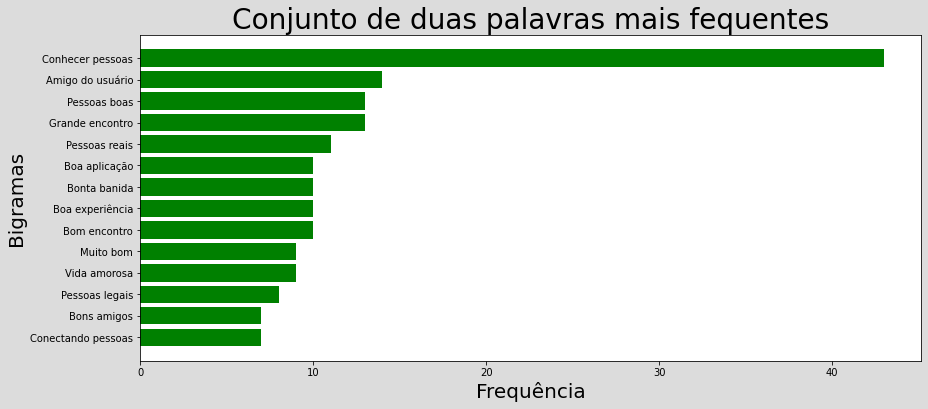

In [28]:
# Gráfico de bigramas - em português concatenando dos bigramas idênticos - total 14 linhas 
plt.figure(figsize = (14,6), facecolor='gainsboro')
plt.title('Conjunto de duas palavras mais fequentes', fontsize=28)
plt.xlabel('Frequência', fontsize=20)
plt.ylabel('Bigramas', fontsize=20)
freq_x=[7, 7, 8, 9, 9, 10, 10, 10, 10, 11, 13, 13, 14, 43]
bigramas_y=['Conectando pessoas',
            'Bons amigos',
            'Pessoas legais',
            'Vida amorosa',
            'Muito bom',
            'Bom encontro',
            'Boa experiência',
            'Bonta banida',
            'Boa aplicação',
            'Pessoas reais',
            'Grande encontro',
            'Pessoas boas',
            'Amigo do usuário',
            'Conhecer pessoas']
x=freq_x
y=bigramas_y
plt.barh(y,x, color='green')

# Máquina Preditiva

### Criado uma nova coluna representando a pontuação de sentimento (1 ou 0). "1" é para usuário que deu nota 4 ou 5 e "0" para quem classificou 1 ou 2. Excluído a pontuação 3 porque representa neutralidade.

In [29]:
# Verificando a porcentagem de cada classificação
percent_scores = 100 * df_1['Rating'].value_counts()/len(review_df2)
percent_scores

1    0.677572
5    0.298390
4    0.074634
2    0.064370
3    0.058065
Name: Rating, dtype: float64

In [30]:
# Mapeando as classificações
df_1['Sentiment_rating'] = np.where(df_1.Rating > 3,1,0)

# Removendo classificacao neutra 
df_1 = df_1[df_1.Rating != 3]

# Mostrando as contagens de cada classe
df_1['Sentiment_rating'].value_counts()


<ipython-input-30-e8d2124c6fe9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Sentiment_rating'] = np.where(df_1.Rating > 3,1,0)


0    5060
1    2544
Name: Sentiment_rating, dtype: int64

# 2.544 com classificação positiva e 5.060 com classificação negativa

In [31]:
# Verificando se as linhas com 3 como pontuações foram removidas e se a coluna Sentiment_rating esta classificando corretamente
df_1.head()
df_1['Sentiment_rating'].shape

,Name,Review,Rating,#ThumbsUp,Date&Time,App,Sentiment_rating
0,linah sibanda,On this app i cant find a partner,5,0,18-02-2022 01:19,Tinder,1
2,David Hume,Still doesn't correctly notify matches or mess...,1,0,18-02-2022 01:11,Tinder,0
3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,0,18-02-2022 01:11,Tinder,0
4,Arthur Magamedov,Love it!,5,0,18-02-2022 01:06,Tinder,1
5,Lukas Rukštelis,Good app.,5,0,18-02-2022 00:57,Tinder,1


(7604,)

In [32]:
#Excluíndo colunas Unnamed
#df_1.drop('Unnamed: 0', axis = 1, inplace = True)
#df_1.drop('Unnamed: 0.1', axis = 1, inplace = True)
#df_1.drop('Unnamed: 0.1.1', axis = 1, inplace = True)
#df_1.drop('Unnamed: 0.1.1.1', axis = 1, inplace = True)
#df_1.drop('Unnamed: 0.1.1.1.1', axis = 1, inplace = True)
#df_1.drop('Unnamed: 0.1.1.1.1.1', axis = 1, inplace = True)
#df_1.drop('Unnamed: 0.1.1.1.1.1.1', axis = 1, inplace = True)
#df_1.drop('Unnamed: 0.1.1.1.1.1.1.1', axis = 1, inplace = True)
#df_1.drop('Unnamed: 0.1.1.1.1.1.1.1.1', axis = 1, inplace = True)

#df_1.head()

In [33]:
#limpeza dos dados novamente após a criação da coluna Sentiment_rating
comentarios1 = []
stop_words1=["0o", "app", "0s", "absolutely", "phone", "dating",  "apps", "number", "super", "likes", "week", "reason", "complete", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
for words in df_1['Review']:
    apenas_letras1 = re.sub("[^a-zA-Z]", " ",words)#somente letras
    tokens1= nltk.word_tokenize(apenas_letras1) #tokenize as sentenças
    minusculas1 = [l.lower() for l in tokens1] #converte para minúsculos
    resultado_filtrado1 = list(filter(lambda l: l not in stop_words1, minusculas1)) #Remove stopwords 
    comentarios1.append(' '.join(resultado_filtrado1))

In [34]:
#Separando de unigrama até trigrama
co3 = CountVectorizer(ngram_range=(1,1))
counts3 = co3.fit_transform(comentarios1)
co4 = CountVectorizer(ngram_range=(2,2))
counts4 = co4.fit_transform(comentarios1)
co5 = CountVectorizer(ngram_range=(3,3))
counts5 = co5.fit_transform(comentarios1)

In [35]:
#Criando a matriz
contagem = CountVectorizer(ngram_range=(1,4))
matriz = contagem.fit_transform(comentarios1)
matriz

<7604x109692 sparse matrix of type '<class 'numpy.int64'>'
	with 157704 stored elements in Compressed Sparse Row format>

#### A matriz possui dimensão de 7.604 por 109.692 com um total de 157.704 elementos

## Separando os dados em treino e teste - 20% para teste

In [36]:
# Separando em treino e teste
X_treino, X_teste, y_treino, y_teste= train_test_split(matriz,
                                                       df_1['Sentiment_rating'],
                                                       test_size = 0.2,
                                                       random_state = 7)

In [37]:
y_teste.value_counts()/y_teste.shape[0]

0    0.648915
1    0.351085
Name: Sentiment_rating, dtype: float64

#### 35% classificando como positivo     -    65% classificando como negativo

#### Utilizando diferentes classificadores

In [38]:
#Função que Treina os dados
def predict(nome, modelo, X_treino, y_treino):
    k = 10
    scores = cross_val_score(modelo, X_treino, y_treino, cv = k)
    taxa_de_acerto = np.mean(scores)
    msg = "Taxa de acerto do {0}: {1}".format(nome, taxa_de_acerto)
    print(msg)
    return taxa_de_acerto

In [39]:
#Utilizando o classificador OneVsRest
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
resultados = {}
modeloOneVsRest = OneVsRestClassifier(LinearSVC(random_state = 0))
resultadoOneVsRest = predict("OneVsRest", modeloOneVsRest, X_treino, y_treino)
resultados[resultadoOneVsRest] = modeloOneVsRest

#Utiliznado o classificador OneVsOne
from sklearn.multiclass import OneVsOneClassifier
modeloOneVsOne = OneVsOneClassifier(LinearSVC(random_state = 0))
resultadoOneVsOne = predict("OneVsOne", modeloOneVsOne, X_treino, y_treino)
resultados[resultadoOneVsOne] = modeloOneVsOne

#Utilizando o classificador MultinomialNb
from sklearn.naive_bayes import MultinomialNB
modeloMultinomial = MultinomialNB()
resultadoMultinomial = predict("MultinomialNB", modeloMultinomial, X_treino, y_treino)
resultados[resultadoMultinomial] = modeloMultinomial


Taxa de acerto do OneVsRest: 0.8586220400138277
Taxa de acerto do OneVsOne: 0.8586220400138277
Taxa de acerto do MultinomialNB: 0.7710005077348544


#### Treinando o modelo com Regressão Logística

In [40]:
# Treinando o modelo através de regressão logística
modelo1 = LogisticRegression()
modelo1.fit(X_treino, y_treino)

LogisticRegression()

In [41]:
# Avaliação da máquina
teste_pred = modelo1.predict(X_teste)

print("Acurácia: ", accuracy_score(y_teste,teste_pred))
print("F1 score: ", f1_score(y_teste,teste_pred))
print("Matriz de confusão: ", f1_score(y_teste,teste_pred))

Acurácia:  0.8468113083497699
F1 score:  0.7555089192025184
Matriz de confusão:  0.7555089192025184


##### A acurácia de 85% representando que o modelo está 85% próximo de um resultado com seu valor  de referência real.

##### O score mostra que o modelo esta acertando 75%, esta equilibrado. Não esta acertando mais do positivo do que do negativo ou vice-versa.

In [42]:
#A diagonal do meio indica o quanto o modelo esta acertando 
print("CM", confusion_matrix(y_teste,teste_pred))

CM [[928  59]
 [174 360]]


##### A diagonal do meio da matriz de confusão mostra que o modelo esta acertando (928, 360) e a outra diagonal mostra o quanto o modelo esta errando (174,59). O modelo acerta mais do que erra.

In [43]:
# Verificando as variáveis que classificaram como positvo 

pesos = pd.DataFrame(list(zip(contagem.get_feature_names(), # obter todos os nomes de recursos n-gram
                              modelo1.coef_[0])), # obter os coeficientes de regressão logística
                     columns= ['Palavras','Pesos']) # definindo os nomes das colunas

Sentimento_Positivo = pd.DataFrame(pesos.sort_values(['Pesos'], ascending = False)[:15]) # 15 recursos mais importantes para avaliações positivas
Sentimento_Positivo

C:\Users\RWINFO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Palavras,Pesos
60850,nice,2.976787
6783,awesome,2.860699
37953,great,2.673545
4472,amazing,2.628342
36920,good,2.505695
19961,cool,2.392415
28631,excellent,2.092424
50463,love,1.927843
26997,easy,1.816611
67971,perfect,1.812617


In [44]:
# Verificando as variáveis que classificarm como negativo
Sentimento_Negativo = pd.DataFrame(pesos.sort_values(['Pesos'], ascending = False)[-15:]) # 15 recursos mais importantes para avaliações negativas
Sentimento_Negativo

,Palavras,Pesos
26143,download,-1.535871
90663,sucks,-1.640358
11767,blocked,-1.655987
41509,horrible,-1.659909
94035,terrible,-1.717568
7542,ban,-1.749780
35035,garbage,-1.765104
82038,scam,-1.846948
58074,money,-1.950838
105107,waste,-1.961438


### Análise do segundo DataSet - O golpista do Tinder

In [45]:
# Lendo o DataSet referente ao 'O golpista do Tinder'
# Lendo o DataSet
review_df = pd.read_csv('TinderSwindlerVersion2.csv')
review_df.head()
review_df.shape

,user_name,user_location,user_created,user_followers,user_verified,date,text,source,is_retweet
0,globalnode.saito 🟥🐳🐈‍⬛,Travelling the World on Web3,2009-06-03 20:18:22+00:00,768,False,2022-02-09 17:09:22+00:00,"@T1gmee Tinder Swindler, off Netflix",Twitter for iPhone,False
1,Ungovernable 🇧🇮,NaN,2011-09-04 22:46:26+00:00,385,False,2022-02-09 17:09:18+00:00,"#tinderswindler , basically homeboy got away w...",Twitter for iPhone,False
2,Adefolake,NaN,2009-06-02 14:18:44+00:00,1994,False,2022-02-09 17:09:17+00:00,Not the tinder swindler becoming a TIk Tok sta...,Twitter for iPhone,False
3,✧ ☽,Noord-Brabant,2012-02-12 07:35:26+00:00,336,False,2022-02-09 17:09:07+00:00,Why isn’t Shimon Hayut in jail ????? #thetinde...,Twitter for iPhone,False
4,chivo. 🥶,PG/MD,2010-03-22 21:23:17+00:00,1046,False,2022-02-09 17:09:06+00:00,the tinder swindler a sick nigga 😂😂,Twitter Web App,False


(76213, 9)

In [46]:
review_df.dtypes

user_name         object
user_location     object
user_created      object
user_followers     int64
user_verified       bool
date              object
text              object
source            object
is_retweet          bool
dtype: object

In [47]:
# Renomeando as colunas para uma melhor identificação
review_df1 = review_df.rename(columns={'user_name': 'Nome_do_Usuário', 
                                       'user_location': 'Localização', 
                                       'user_created': 'Data_de_Criação', 
                                       'user_followers': 'Quantidade_de_seguidores', 
                                       'user_verified': 'Verificada',
                                       'date': 'Data', 
                                       'text': 'Texto', 
                                       'source': 'Fonte', 
                                       'is_retweet': 'Retweet'})
review_df1.head()

,Nome_do_Usuário,Localização,Data_de_Criação,Quantidade_de_seguidores,Verificada,Data,Texto,Fonte,Retweet
0,globalnode.saito 🟥🐳🐈‍⬛,Travelling the World on Web3,2009-06-03 20:18:22+00:00,768,False,2022-02-09 17:09:22+00:00,"@T1gmee Tinder Swindler, off Netflix",Twitter for iPhone,False
1,Ungovernable 🇧🇮,NaN,2011-09-04 22:46:26+00:00,385,False,2022-02-09 17:09:18+00:00,"#tinderswindler , basically homeboy got away w...",Twitter for iPhone,False
2,Adefolake,NaN,2009-06-02 14:18:44+00:00,1994,False,2022-02-09 17:09:17+00:00,Not the tinder swindler becoming a TIk Tok sta...,Twitter for iPhone,False
3,✧ ☽,Noord-Brabant,2012-02-12 07:35:26+00:00,336,False,2022-02-09 17:09:07+00:00,Why isn’t Shimon Hayut in jail ????? #thetinde...,Twitter for iPhone,False
4,chivo. 🥶,PG/MD,2010-03-22 21:23:17+00:00,1046,False,2022-02-09 17:09:06+00:00,the tinder swindler a sick nigga 😂😂,Twitter Web App,False


In [48]:
review_df1.dtypes

Nome_do_Usuário             object
Localização                 object
Data_de_Criação             object
Quantidade_de_seguidores     int64
Verificada                    bool
Data                        object
Texto                       object
Fonte                       object
Retweet                       bool
dtype: object

In [49]:
# Verificando se possui valores nulos
review_df1.isnull().sum()

Nome_do_Usuário                 5
Localização                 18481
Data_de_Criação                 0
Quantidade_de_seguidores        0
Verificada                      0
Data                            0
Texto                           0
Fonte                           0
Retweet                         0
dtype: int64

##### <font color='GREEN'>A coluna "Texto" não possui valores nulos</font>

In [50]:
# Visualizando apenas a coluna "Texto"
review_texto = review_df1['Texto']
#Visualizando a coluna Texto
review_texto.head()

0                 @T1gmee Tinder Swindler, off Netflix
1    #tinderswindler , basically homeboy got away w...
2    Not the tinder swindler becoming a TIk Tok sta...
3    Why isn’t Shimon Hayut in jail ????? #thetinde...
4                  the tinder swindler a sick nigga 😂😂
Name: Texto, dtype: object

In [51]:
comentarios = []
stop_words=["0o", "https", "tinder", "swindler", "shimon" , "hayut", "red", "leviev", "flags", "flag", "south", "africa", "tilda", "swinton", "guy", "man", "tinderswindler", "simon", "gt", "dating", "app", "apps", "documentary", "watched", "thetinderswindler", "watch", "watching", "netflix", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
for words in review_df1['Texto']:
    apenas_letras = re.sub("[^a-zA-Z]", " ",words)#somente letras
    tokens = nltk.word_tokenize(apenas_letras) #tokenize as sentenças
    minusculas = [l.lower() for l in tokens] #converte para minúsculos
    resultado_filtrado = list(filter(lambda l: l not in stop_words, minusculas)) #Remove stopwords 
    comentarios.append(' '.join(resultado_filtrado))

<Figure size 1440x864 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

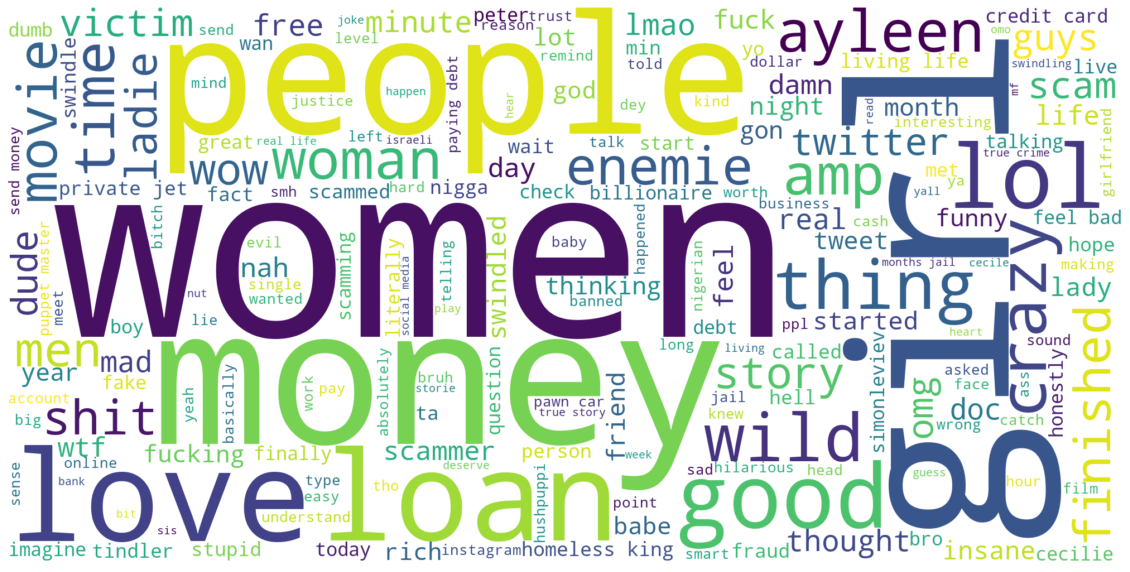

In [52]:
# Visualizando os dados
# Comentários

#Usando wordcloud para visualizar comentarios
palavras=(" ").join(comentarios)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(palavras)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
# Usando CountVectorizer para obter os unigramas mais importantes 
co = CountVectorizer(ngram_range=(1,1))
counts = co.fit_transform(comentarios)
unigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(30)

C:\Users\RWINFO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
# Renomeando as colunas
unigrams1=unigrams
unigrams1=unigrams1.reset_index()
unigrams1.rename(columns={'index':'Unigrama', 0:'Frequência'}, inplace=True)
print(unigrams1)

       Unigrama  Frequência
0         women        5412
1         money        3416
2        people        2308
3        ayleen        2139
4          wild        2042
5          love        1843
6          girl        1832
7         crazy        1818
8          good        1738
9       enemies        1731
10         life        1646
11        woman        1499
12          lol        1486
13        story        1468
14         shit        1444
15          amp        1348
16         time        1313
17        loans        1267
18         real        1236
19        movie        1156
20         free        1142
21        thing        1139
22        girls        1132
23         feel        1096
24          men        1095
25  billionaire        1053
26         loan        1044
27     finished        1037
28       ladies         969
29          wow         966


In [55]:
# Usando CountVectorizer para obter os bigramas mais importantes
co = CountVectorizer(ngram_range=(2,2))
counts = co.fit_transform(comentarios)
bigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)

C:\Users\RWINFO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [56]:
# Renomeando as colunas
bigramas1=bigrams
bigramas1=bigramas1.reset_index()
bigramas1.rename(columns={'index':'Bigrama', 0:'Frequência'}, inplace=True)
print(bigramas1)

         Bigrama  Frequência
0  homeless king         414
1    living life         389
2    private jet         328
3       feel bad         314
4  puppet master         297
5       pawn car         235
6     send money         225
7    credit card         209
8      real life         187
9    months jail         187


In [57]:
# Usando CountVectorizer para obter os bigramas mais importantes
co = CountVectorizer(ngram_range=(2,2))
counts = co.fit_transform(comentarios)
bigrams2 = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(15)

C:\Users\RWINFO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [58]:
# Renomeando as colunas
bigramas3=bigrams2
bigramas3=bigramas3.reset_index()
bigramas3.rename(columns={'index':'Bigrama', 0:'Frequência'}, inplace=True)
print(bigramas3)

          Bigrama  Frequência
0   homeless king         414
1     living life         389
2     private jet         328
3        feel bad         314
4   puppet master         297
5        pawn car         235
6      send money         225
7     credit card         209
8       real life         187
9     months jail         187
10     true story         179
11   paying debts         175
12     true crime         173
13   social media         171
14    women money         161


<Figure size 1008x432 with 0 Axes>

Text(0.5, 1.0, 'Conjunto de duas palavras mais fequentes')

Text(0.5, 0, 'Frequência')

Text(0, 0.5, 'Bigramas')

<BarContainer object of 15 artists>

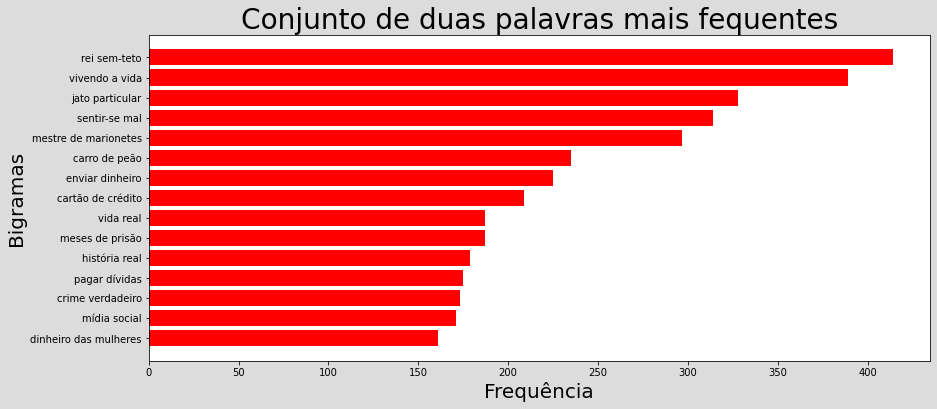

In [59]:
# Gráfico de bigramas
plt.figure(figsize = (14,6), facecolor='gainsboro')
plt.title('Conjunto de duas palavras mais fequentes', fontsize=28)
plt.xlabel('Frequência', fontsize=20)
plt.ylabel('Bigramas', fontsize=20)
freq_x=[161, 171, 173, 175, 179, 187, 187, 209, 225, 235, 297, 314, 328, 389, 414]
bigramas_y=['dinheiro das mulheres', 'mídia social', 'crime verdadeiro', 'pagar dívidas', 'história real', 'meses de prisão', 'vida real', 'cartão de crédito', 'enviar dinheiro', 'carro de peão', 'mestre de marionetes', 'sentir-se mal', 'jato particular', 'vivendo a vida', 'rei sem-teto']
x=freq_x
y=bigramas_y
plt.barh(y,x, color='red')